# Sample Take Home Assignment
https://towardsdatascience.com/sample-take-home-coding-exercise-for-a-data-scientist-position-8086dd195a76

Directions:
1. Read the file and display columns.
2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
3. Select columns that will be probably important to predict “crew” size.
4. If you removed columns explain why you removed those.
5. Use one-hot encoding for categorical features.
6. Create training and testing sets (use 60% of the data for the training and reminder for testing).
7. Build a machine learning model to predict the ‘crew’ size.
8. Calculate the Pearson correlation coefficient for the training set and testing data sets.
9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
10. What is regularization? What is the regularization parameter in your model?
11. Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,9)

## 1. Read the file and display columns

In [2]:
df = pd.read_csv('data.txt')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## 2. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


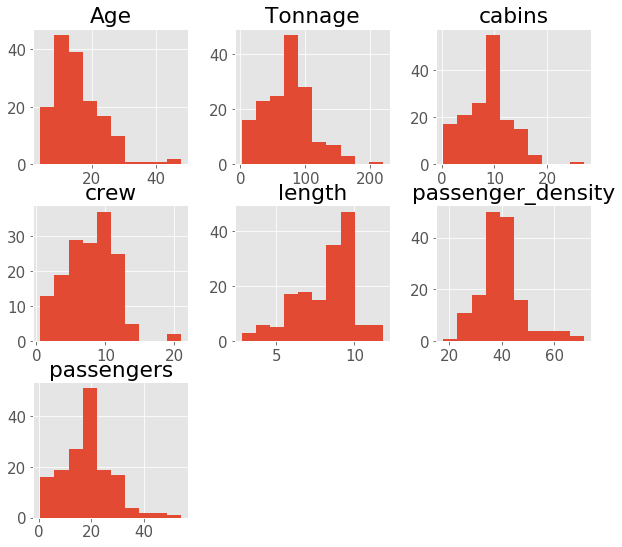

In [4]:
df.hist(bins=10);

## 3. Select columns that will be probably important to predict “crew” size

I am thinking anything that would do with the size of the ship and maybe passenger density

## 4. If you removed columns explain why you removed those

I will remove age only because age may have something to do with price and not crew size

## 5. Use one-hot encoding for categorical features

In [5]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [6]:
df_full = pd.concat([df, pd.get_dummies(df['Ship_name'])], axis=1)
df_full = pd.concat([df, pd.get_dummies(df['Cruise_line'])], axis=1)

In [7]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## 6. Create training and testing sets (use 60% of the data for the training and reminder for testing) 

In [8]:
X = df.drop(columns=['Ship_name', 'Cruise_line', 'crew'], axis =1)
y = df.crew

In [9]:
X

,Age,Tonnage,passengers,length,cabins,passenger_density
0,6,30.277,6.94,5.94,3.55,42.64
1,6,30.277,6.94,5.94,3.55,42.64
2,26,47.262,14.86,7.22,7.43,31.80
3,11,110.000,29.74,9.53,14.88,36.99
4,17,101.353,26.42,8.92,13.21,38.36
...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62
154,14,76.800,19.60,8.79,9.67,39.18
155,25,5.350,1.58,4.40,0.74,33.86
156,27,5.350,1.67,4.40,0.74,32.04


In [10]:
y

0       3.55
1       3.55
2       6.70
3      19.10
4      10.00
       ...  
153     0.59
154    12.00
155     0.88
156     0.88
157     1.80
Name: crew, Length: 158, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size = 0.4
                                                    , random_state = 42
                                                   )

In [13]:
len(X_train), len(y_train)

(94, 94)

In [14]:
len(X_test), len(y_test)

(64, 64)

In [15]:
94 + 64

158

## 7. Build a machine learning model to predict the ‘crew’ size

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfr = RandomForestRegressor(n_estimators = 100
                            , max_depth = 5
                            , max_features = 3
                            , n_jobs = 8
                            , random_state = 42
                           )

rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=8, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred = rfr.predict(X_test)

#### Feature Importances:

In [19]:
(X_train.columns)[np.argsort(rfr.feature_importances_)[-6:]][::-1]

Index(['length', 'cabins', 'Tonnage', 'passengers', 'Age',
       'passenger_density'],
      dtype='object')

In [20]:
len(X_train.columns)

6

In [21]:
np.argmax(rfr.feature_importances_)

3

In [22]:
X_train.columns[3]

'length'

In [23]:
rfr.score(X_test, y_test)

0.8314319061680122

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(rfr, X, y, cv=5)
print(scores)
print(np.mean(scores))

[0.6043902  0.927207   0.84293546 0.95624215 0.85009114]
0.8361731888514277


## 8. Calculate the Pearson correlation coefficient for the training set and testing data sets

In [26]:
X_train.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density
Age,1.000000,-0.557336,-0.444823,-0.464060,-0.450659,-0.256176
Tonnage,-0.557336,1.000000,0.933508,0.938135,0.944813,-0.126416
passengers,-0.444823,0.933508,1.000000,0.889615,0.982828,-0.404539
length,-0.464060,0.938135,0.889615,1.000000,0.907111,-0.178098
cabins,-0.450659,0.944813,0.982828,0.907111,1.000000,-0.381106
passenger_density,-0.256176,-0.126416,-0.404539,-0.178098,-0.381106,1.000000


In [27]:
X_test.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density
Age,1.000000,-0.660642,-0.596547,-0.612236,-0.576786,-0.330000
Tonnage,-0.660642,1.000000,0.957292,0.903531,0.952810,0.096448
passengers,-0.596547,0.957292,1.000000,0.871567,0.967937,-0.123738
length,-0.612236,0.903531,0.871567,1.000000,0.865107,0.061497
cabins,-0.576786,0.952810,0.967937,0.865107,1.000000,-0.057813
passenger_density,-0.330000,0.096448,-0.123738,0.061497,-0.057813,1.000000


In [28]:
import seaborn as sns

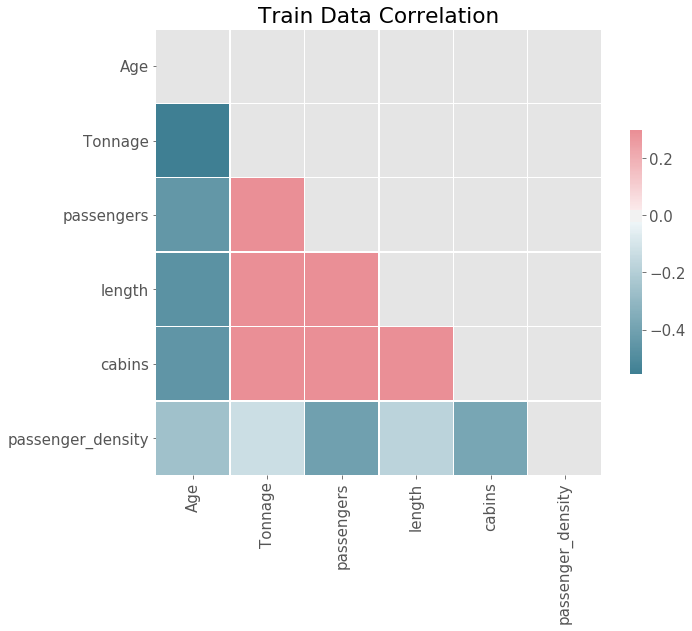

In [29]:
corr_train = X_train.corr()
mask = np.triu(np.ones_like(corr_train, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_train
           , mask=mask
           , cmap=cmap
           , vmax=.3
           , center=0
           , square=True
           , linewidths=0.5
           , cbar_kws={'shrink': 0.5}
          )
plt.yticks(rotation=0)
plt.title('Train Data Correlation');

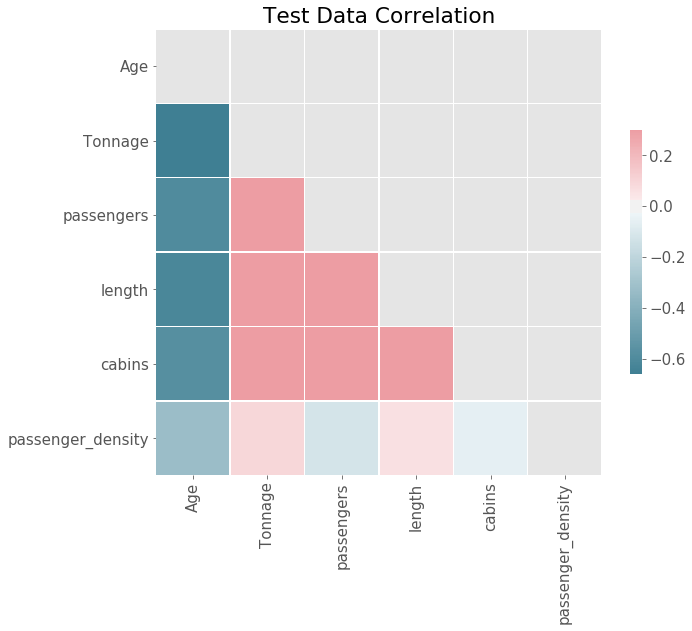

In [30]:
corr_test = X_test.corr()
mask = np.triu(np.ones_like(corr_train, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_test
           , mask=mask
           , cmap=cmap
           , vmax=0.3
           , center=0
           , square=True
           , linewidths=0.5
           , cbar_kws={'shrink': 0.5}
          )
plt.yticks(rotation=0)
plt.title('Test Data Correlation');

## 9. Describe hyper-parameters in your model and how you would change them to improve the performance of the model 

I would increase the n-estimators in the random forest regressor, but then the model will have high variance.

## 10. What is regularization? What is the regularization parameter in your model?

Regularization minimizes coefficents in the linear regression model.
<br> 

Increasing bias in hopes of decreasing variance.
<br>

There is no regularization in the random forest regression model. 

## 11. Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has bias problem or variance problem

In [31]:
from sklearn.model_selection import GridSearchCV

random_classifier = RandomForestRegressor()

parameters = {'n_estimators':[5, 10, 15, 20, 30, 40, 50, 60]
              , 'max_features':np.arange(2, 5)
              , 'max_depth':np.arange(2, 5)
              , 'min_samples_leaf': [10,20,30,50]
             }

random_grid = GridSearchCV(random_classifier
                           , parameters
                           , cv = 5
                           , return_train_score=True
                           , verbose = 1
                           
                          )
random_grid.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:   57.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
random_grid.best_params_

{'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 10, 'n_estimators': 30}

### Lasso Model

In [33]:
from sklearn.linear_model import Lasso

In [34]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_model.coef_

array([ 0.        ,  0.09025356,  0.        ,  0.        ,  0.        ,
       -0.04621646])

In [35]:
X_train.columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins',
       'passenger_density'],
      dtype='object')